# COSC 757 - Group Project - UFO

In this project we will take a look at a data set representing UFO sightings around the world. We will try to determine if there is a relationship between a UFO sightings’ location and shape through regression analysis.


## Data Preprocessing

In [16]:
import pandas as pd
import seaborn as sb
import statsmodels.api as sm
import numpy as np
import category_encoders as ce
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter


import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
#reading csv file into data frame
df = pd.read_csv('/Users/fsaintamour/Documents/School/UFO/ufo.csv')
pd.options.display.max_rows = None # setting pandas option
#pd.set_printoptions(max_rows=None)
#print headers
print "ufo - header"
print df.head()

print
#get info and identify missing values
print "ufo - Summary"
print df.info()

ufo - header
          Date_time                  city state/province country UFO_shape  \
0  10/10/1949 20:30            san marcos             tx      us  cylinder   
1  10/10/1949 21:00          lackland afb             tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)            NaN      gb    circle   
3  10/10/1956 21:00                  edna             tx      us    circle   
4  10/10/1960 20:00               kaneohe             hi      us     light   

  length_of_encounter_seconds described_duration_of_encounter  \
0                        2700                      45 minutes   
1                        7200                         1-2 hrs   
2                          20                      20 seconds   
3                          20                        1/2 hour   
4                         900                      15 minutes   

                                         description date_documented  \
0  This event took place in early fall around 194...   

From the above we can see that the count for city, country, data_time, etc... is 80332 but for state/province, ufo_shape and description we have a lower number. This is an indication that some data is missing for these fields.

Since the aim of our analysis is to see if there is a relation between location and ufo_shape we can drop some of the other columns...

In [18]:
#replacing empty ufo_shape with 'other'
df.loc[df['UFO_shape'] == "", 'UFO_shape'] = np.NaN

#replacing empty contry values
df.loc[df['country'] == "", 'country'] = np.NaN

#replacing empty contry values
df.loc[df['state/province'] == "", 'country'] = np.NaN

#replacing ? and ?? with NaN
df.loc[df['city'] == "", 'city'] = np.NaN
df.loc[df['city'] == "?", 'city'] = np.NaN
df.loc[df['city'] == "??", 'city'] = np.NaN

#dropping some columns
df.drop('Date_time',axis=1, inplace=True)
df.drop('length_of_encounter_seconds',axis=1, inplace=True)
df.drop('described_duration_of_encounter',axis=1, inplace=True)
df.drop('date_documented',axis=1, inplace=True)
df.drop('description',axis=1, inplace=True)
df.drop('latitude',axis=1, inplace=True)
df.drop('longitude',axis=1, inplace=True)

#drop all other NaN values
df.dropna(inplace=True)
print "ufo - Summary"
print df.info()

ufo - Summary
<class 'pandas.core.frame.DataFrame'>
Int64Index: 66524 entries, 0 to 80331
Data columns (total 4 columns):
city              66524 non-null object
state/province    66524 non-null object
country           66524 non-null object
UFO_shape         66524 non-null object
dtypes: object(4)
memory usage: 2.5+ MB
None


After removing NaN values our data set was reduced from 80332 records to 66524

## EDA

We will start the EDA process by graphing the relevant columns (ufo_shape, state/province, country, city) of our data

Bar graph of ufo_shape


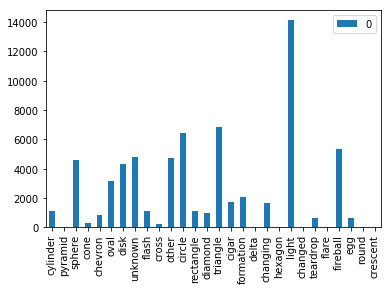

In [19]:
print "Bar graph of ufo_shape"
counts = Counter(df['UFO_shape'])
df_hist = pd.DataFrame.from_dict(counts, orient='index')
df_hist.plot(kind='bar')

In [20]:
# since there are too many entries. graphing city take too long
# instead let's print out the values
city = df['city']
city = city.sort_values(ascending=True)
print "City..."
for i in city.unique():
    print i

City...
abbeville
abbeville (lake secession)
abbotsford (canada)
aberdeen
abilene
abingdon
abington
abita springs
absecon
academy
acampo
accokeek
accokeek (on hwy 210)
accord
ackerman
acme
acton
acton (approx.)
acton (canada)
acton vale (canada)
acushnet
acworth
ada
adair
adairsville
adairville
adak
adams
adams county
adams county (on co. hwy. d)
adamsville
addison
addison (i-355 and us 20 (lake st.)
addy
adel
adelaide  (south australia)
adelanto
adkins
adrian
advance
agawam
agency
agoura hills
agra
agua dulce
aguanga
aguila
aguilar
ahwahnee
ahwatukee
aiea
aiken
aiken county (rural)
ainsworth
airdrie (canada)
airmont
airway heights
aitkin
ajax (canada)
ajo
ajo (and southern arizona)
akeley
akin
akron
akron (ellet)
akron (north of)
alabaster
alachua
alachua county
alameda
alamo
alamogordo
alamosa
alamosa (east of&#44 on hwy 160)
alamosa (madano pass)
alamosa (west of)
alanson
albany
albany (3 hrs w of: on interstate-90 near exit 44)
albany (about 10 minutes from)
albany (area)
albany (c

copeville
copiague
copley
coppell
copperas cove
coquitlam (canada)
coral gables
coral springs
coralville
coralville (east of)
coram
corapeake
corbett
corbin
corcoran
cordele
cordell
cordes
cordes junction
cordova
corfu
corfu (darien/pembroke/alexander)
corinne
corinth
cornelius
cornell
corner brook (canada)
cornersville
corning
cornish
cornville
cornwall
cornwall (canada)
cornwall (south stormont) (canada)
cornwall bridge
cornwall-on-hudson
cornwallville
corolla
corona
corona del mar
coronado
corpus christi
corpus christi (maliki beach)
corpus christi (off shore)
corpus christi (water garden)
corrales
corralitos
correctionville
correo
corry
corryton
corsica
corsicana
corte madera
cortez
cortez (4 miles north of)
cortez (4 miles northeast of)
cortland
corunna
corvallis
corvallis (near; small town of alsea)
corydon
cosby
coshocton
coso junction
cossayuna
costa mesa
cotati
coto de caza
cottage grove
cottage hills
cotton
cottontown
cottonwood
cottonwood (30 min.west of sedona)
cottonwood h

golden meadow
golden pond (near)
golden valley
goldendale
goldendale (3 miles ne of)
goldendale (north of)
goldfield
goldfield (near)
goldsboro
goldsboro (north of)
goldsmith
goldthwaite
goleta
gonzales
goochland
goochland county
good hope
good spring
gooderham (canada)
goodland
goodland (@10 miles east of)
goodlettsville
goodman
goodrich
goodyear
goose creek
gordo
gordon
gorham
gorman
gorman (15 miles north of&#44 i-5)
gorman (60 miles north of los angeles)
goshen
gothenburg
gowanda
gracemont
graettinger
graford
grafton
graham
grahamsville
grain valley
grainfield
gramercy (on hwy. 61)
granada hills
granbury
granby
grand bay
grand bay (canada)
grand bend (canada)
grand bend (north of forest and sarnia) (canada)
grand bend (outside of) (canada)
grand blanc
grand canyon
grand canyon (100 miles from)
grand canyon (north rim)
grand canyon (unsure&#44 on route 66 heading to the)
grand chain
grand chenier
grand coulee
grand forks
grand forks (60 km north of) (arrow lakes) (canada)
grand fork

leitchfield
leland
lemitar
lemon grove
lemont
lemoore
lempster
lena
lenexa
lenexa (greater kansas city metro area)
lenoir
lenoir city
lenore
lenox
lenox (general area)
lenwood
lenzburg
leola
leominster
leon
leon valley
leonard
leonardo
leonardtown
leroy
les escoumins (canada)
lesage
lesage (near)
leslie
leslie county
lesslie
letart
lethbridge (canada)
lethbridge (northwest of about 12 miles) (canada)
lettsworth
leupp
levan (yuba state park)
level cross
levelland
levering
levittown
lewes
lewis center
lewisburg
lewiston
lewiston (near)
lewistown
lewisville
lexington
lexington (west of)
libby
liberal
liberty
liberty hill
liberty lake
libertyville
licking
lido beach
lighthouse point
ligonier
lihue
lihue (kauai)
lilburn
lillington
lily
lima
lima (just south of mile marker 117)
limerick
limestone
limestone (loring afb)
limon
limon (near)
lincoln
lincoln (approx 3 miles east of&#44 on hwy 193)
lincoln (east of)
lincoln (near)
lincoln (west of)
lincoln beach
lincoln city
lincoln city (north of

orange
orange (also visable from covina)
orange (w/b sr-22&#44 garden grove fwy&#44 @ main st.)
orange beach
orange city
orange county
orange county (location unspecified)
orange grove
orange heights (near)
orange lake
orange park
orange park (outside jacksonville)
orangeburg
orangevale
orangevale (sacramento)
orangeville
orangeville (canada)
orangeville (ontario) (canada)
orchard lake
orchard park
orchards
orcutt
ord
ore city
orefield
oregon
oregon city
oregon house
oreland
orem
orient
oriental
orillia (canada)
orinda
oriskany falls
orland
orland hills
orland park
orlando
orlando (1hr south)
orlando (70 miles north of)
orlando (disney world resort)
orlando (nearby)
orlando (outside of; on 14)
orlando (outside)
orlando (south-southeast)
orlando (state rt. 474&#44 w. of)
orlando (sw orange co.)
orleans
orleans (canada)
ormond beach
ormstown (canada)
oro grande
oro valley
orofino
orofino (16 miles east of)
oromocto (canada)
orondo (near)
orono
orono (university of maine)
oroville
orr
orr

san angelo
san anselmo
san antonio
san antonio (ranch outside of)
san benito
san bernardino
san bernardino county
san bruno
san carlos
san carlos (of san diego)
san clemente
san diego
san diego  (spring valley) (20 mi. e of sd airport)
san diego  (u. s. naval base)
san diego (allied gardens)
san diego (camp pendleton)
san diego (carmel mountain)
san diego (clairemont)
san diego (clairmont)
san diego (cleveland national forest)
san diego (mira mesa)
san diego (mission bay area)
san diego (mission bay walk/santa clara ct. m.b.)
san diego (north coastal area)
san diego (north of&#44 at sea)
san diego (north of)
san diego (north)
san diego (ocean beach)
san diego (on mexican border)
san diego (pacific beach)
san diego (pe&ntilde;asquitos)
san diego (point loma)
san diego (point loma/ocean beach area)
san diego (ranch environment)
san diego (south park)
san diego (southbay)
san diego county
san dimas
san elizario
san fernando
san francisco
san francisco (50 miles south of)
san francisco (fa

waupun
wausau
wauseon
wautoma
wauwatosa
waveland
waverly
waverly hall
waves
wawina
wax
waxahachie
waxhaw
waycross
wayland
wayne
waynesboro
waynesboro (near)
waynesburg
waynesburg (north of)
waynesburg (outside of)
waynesville
wayzata
weare
weatherford
weatherford (2 &amp; a half miles south of)
weaverville
webb
webberville
webster
webster city
webster groves
webster groves (st. louis)
weddington
wedgefield
wedowee
weed
weehawken
weekapaug
weeki wachee
weems
weidman
weimar
weingarten
weirton
weiser
wekiva
welches
weldon
welland (canada)
welland (ontario) (canada)
wellersburg
wellesley
wellfleet
wellington
wellington (canada)
wellington county (canada)
wells
wells (30 miles north of)
wellsboro
wellsburg
wellston
wellston (near to)
wellsville
wellton
wenatchee
wendell
wenden
wendover
wendover (76 miles north.&amp; 50 miles south s.l.c.)
wendover (approx. 20 miles e of nv. i-80)
wendover (east of&#44 on i-80)
wenksville
wenona
wentworth
wentzville
weogufka
wernersville
weslaco
wesley chape

From the above print out of city

chicago  
chicago (&#39burbs)  
chicago (1 hours south ofoff i 57)  
chicago (1/2 hour out of)  
chicago (about 50 miles south of&#44 i-55 south)  
chicago (downtown&#44 on l. michigan)  
chicago (downtown)  
chicago (east of)  
chicago (hwy. 531)  
chicago (in-flight sighting)  
chicago (irving park road)  
chicago (near o&#39hare airport)  
chicago (near)  
chicago (o&#39hare airport)  
chicago (over lake michigan)  
chicago (over nw indiana?)  
chicago (south suburb)  
chicago (southwest side)  
chicago (southwest suburbia)  
chicago (southwest suburbs of)  
chicago (sw sky over lake michigan)  
chicago (west suburbs)  
chicago (xxxx w 55 st.&#44 by midway airport)  
chicago heights  
chicago ridge  

we can see that city can also refer too specific parts of a city (which is why there are so many entries)
Because of that we will focus on state/province, country & ufo_shape for out analysis

Bar graph of country


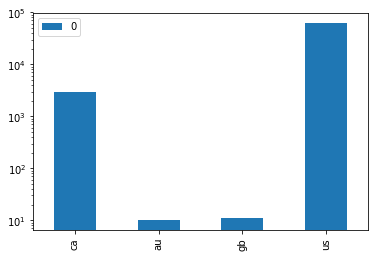

In [21]:
print "Bar graph of country"
counts = Counter(df['country'])
df_hist = pd.DataFrame.from_dict(counts, orient='index')
df_hist.plot(kind='bar', logy=True)

Bar graph of state/province


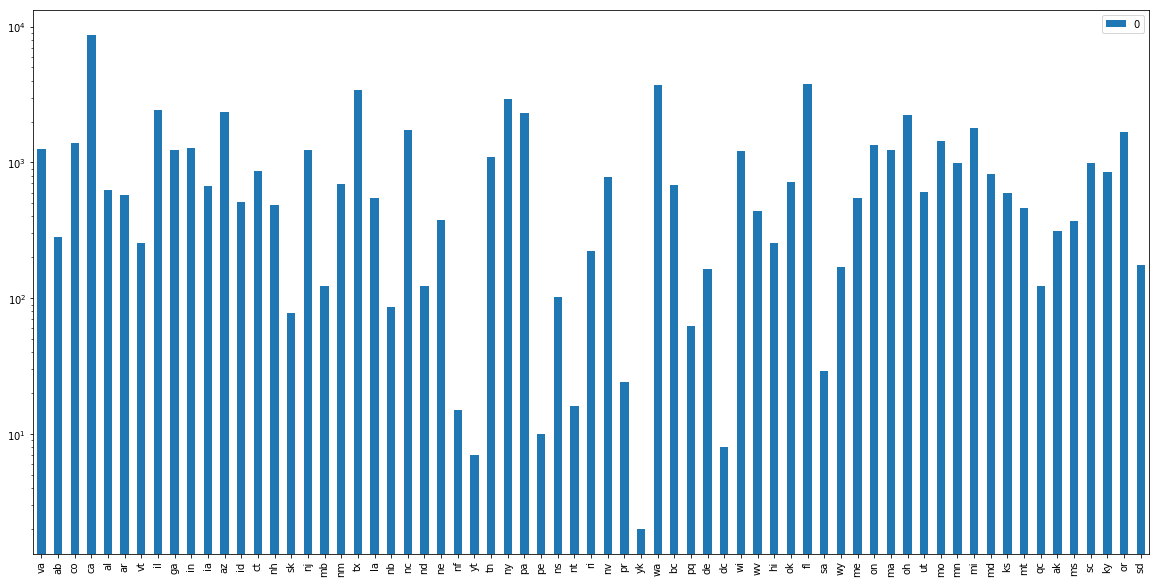

In [22]:
print "Bar graph of state/province"
counts = Counter(df['state/province'])
df_hist = pd.DataFrame.from_dict(counts, orient='index')
df_hist.plot(kind='bar', logy=True, figsize=(20, 10))

## Regression Analysis

In [23]:
#setting up category codes
df['country'] = df['country'].astype('category')
df['country_cat'] = df['country'].cat.codes

df['UFO_shape'] = df['UFO_shape'].astype('category')
df['shape_cat'] = df['UFO_shape'].cat.codes

df['city'] = df['city'].astype('category')
df['city_cat'] = df['city'].cat.codes

df['state/province'] = df['state/province'].astype('category')
df['state_cat'] = df['state/province'].cat.codes

#getting dummy data to replace string data
country_dummy = pd.get_dummies(df['country'])
state_dummy = pd.get_dummies(df['state/province'])
shape_dummy = pd.get_dummies(df['UFO_shape'])
city_dummy = pd.get_dummies(df['city'])

print "shape and country regression"
print ""
mod1 = sm.OLS(df['shape_cat'], df['country_cat']).fit()
print(mod1.summary())


print "shape and state regression"
print ""
mod2 = sm.OLS(df['shape_cat'], df['state_cat']).fit()
print(mod2.summary())


print "city and state regression"
print ""
mod3 = sm.OLS(df['shape_cat'], df['city_cat']).fit()
print(mod3.summary())

print "multivariable regression"
print ""
mod4 = sm.OLS(df['shape_cat'], df.loc[:,['city_cat','country_cat', 'state_cat']]).fit()
print(mod4.summary())



shape and country regression

                            OLS Regression Results                            
Dep. Variable:              shape_cat   R-squared:                   51816.134
Model:                            OLS   Adj. R-squared:              51816.913
Method:                 Least Squares   F-statistic:                -6.652e+04
Date:                Sat, 03 Nov 2018   Prob (F-statistic):               1.00
Time:                        14:55:43   Log-Likelihood:            -2.3225e+05
No. Observations:               66524   AIC:                         4.645e+05
Df Residuals:                   66523   BIC:                         4.645e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
country_cat     5.53